In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%cd /glade/u/home/eyankovsky/CESM/cesm2_3_alpha12b+mom6_marbl/components/mom/standalone/examples/single_column/KPP_MARBL
#fs = xr.open_dataset('KPP/static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
ds = xr.open_dataset('prog.nc', decode_times=False)  
MARBL = xr.open_dataset('marbl.nc', decode_times=False)
prog = xr.open_dataset('prog_z.nc', decode_times=False)
visc = xr.open_dataset('visc.nc', decode_times=False)
forcing = xr.open_dataset('surffluxes.nc', decode_times=False)

/glade/u/home/eyankovsky/CESM/cesm2_3_alpha12b+mom6_marbl/components/mom/standalone/examples/single_column/KPP_MARBL


In [3]:
dz = np.array(ds.zi.diff('zi'))
dz.shape


(75,)

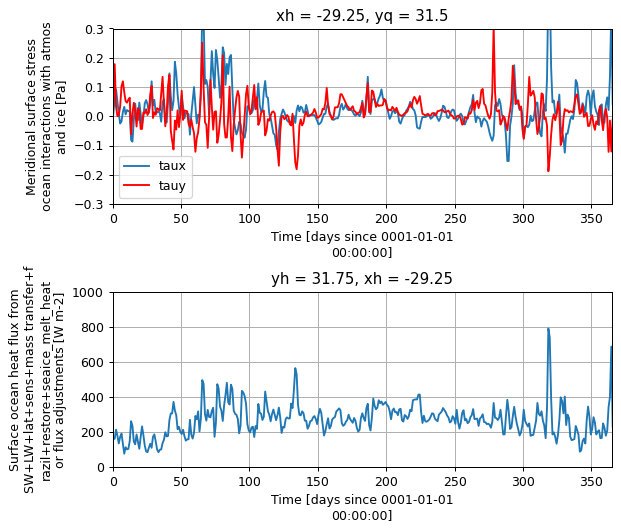

In [5]:
fig = plt.figure(figsize=(7, 6),dpi=90)

timelim=365
plt.subplot(2,1,1)
forcing.taux[:,1,1].plot(label='taux')
forcing.tauy[:,1,1].plot(color='r',label='tauy')
plt.legend(); plt.grid('on'); plt.xlim([0,timelim]); plt.ylim([-0.3,0.3])

plt.subplot(2,1,2)
forcing.net_heat_surface[:,1,1].plot()
plt.grid('on'); 
plt.xlim([0,timelim]); plt.ylim([0,1000])
fig.tight_layout()


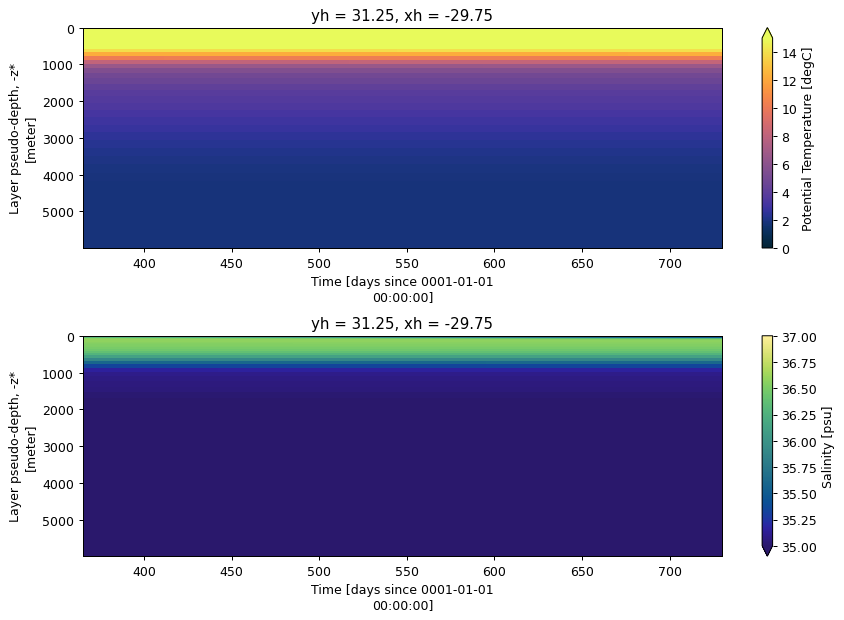

In [6]:
fig = plt.figure(figsize=(10, 7),dpi=90)
plt.subplot(2,1,1)
ds.temp[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=15)
plt.gca().invert_yaxis()
plt.xlim([365,365*2]);

plt.subplot(2,1,2)
ds.salt[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=35,vmax=37)
plt.gca().invert_yaxis()
plt.xlim([365,365*2]);

fig.tight_layout()

In [54]:
prog

<xarray.Dataset>
Dimensions:      (Time: 1825, xh: 2, xq: 3, yh: 2, yq: 3, z_i: 35, z_l: 34, zl: 75)
Coordinates:
  * xq           (xq) float64 -30.0 -29.5 -29.0
  * yh           (yh) float64 31.25 31.75
  * z_l          (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03
  * z_i          (z_i) float64 0.0 5.0 15.0 25.0 ... 5.25e+03 5.75e+03 6.25e+03
  * Time         (Time) float64 1.0 2.0 3.0 ... 1.823e+03 1.824e+03 1.825e+03
  * xh           (xh) float64 -29.75 -29.25
  * yq           (yq) float64 31.0 31.5 32.0
  * zl           (zl) float64 1.0 3.0 5.0 7.0 ... 5.432e+03 5.659e+03 5.886e+03
Data variables:
    u            (Time, z_l, yh, xq) float32 ...
    v            (Time, z_l, yq, xh) float32 ...
    temp         (Time, z_l, yh, xh) float32 ...
    salt         (Time, z_l, yh, xh) float32 ...
    PO4          (Time, zl, yh, xh) float32 ...
    NO3          (Time, zl, yh, xh) float32 ...
    SiO3         (Time, zl, yh, xh) float32 ...
    NH4          (Time, zl, yh, xh) float32 ...
    Fe           (Time, zl, yh, xh) float32 ...
    Lig          (Time, zl, yh, xh) float32 ...
    O2           (Time, zl, yh, xh) float32 ...
    DIC          (Time, zl, yh, xh) float32 ...
    DIC_ALT_CO2  (Time, zl, yh, xh) float32 ...
    ALK          (Time, zl, yh, xh) float32 ...
    ALK_ALT_CO2  (Time, zl, yh, xh) float32 ...
    DOC          (Time, zl, yh, xh) float32 ...
    DON          (Time, zl, yh, xh) float32 ...
    DOP          (Time, zl, yh, xh) float32 ...
    DOPr         (Time, zl, yh, xh) float32 ...
    DONr         (Time, zl, yh, xh) float32 ...
    DOCr         (Time, zl, yh, xh) float32 ...
    microzooC    (Time, zl, yh, xh) float32 ...
    mesozooC     (Time, zl, yh, xh) float32 ...
    spChl        (Time, zl, yh, xh) float32 ...
    spC          (Time, zl, yh, xh) float32 ...
    spP          (Time, zl, yh, xh) float32 ...
    spFe         (Time, zl, yh, xh) float32 ...
    coccoChl     (Time, zl, yh, xh) float32 ...
    coccoC       (Time, zl, yh, xh) float32 ...
    coccoP       (Time, zl, yh, xh) float32 ...
    coccoFe      (Time, zl, yh, xh) float32 ...
    coccoCaCO3   (Time, zl, yh, xh) float32 ...
    diatChl      (Time, zl, yh, xh) float32 ...
    diatC        (Time, zl, yh, xh) float32 ...
    diatP        (Time, zl, yh, xh) float32 ...
    diatFe       (Time, zl, yh, xh) float32 ...
    diatSi       (Time, zl, yh, xh) float32 ...
    diazChl      (Time, zl, yh, xh) float32 ...
    diazC        (Time, zl, yh, xh) float32 ...
    diazP        (Time, zl, yh, xh) float32 ...
    diazFe       (Time, zl, yh, xh) float32 ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

(-500.0, 0.0)

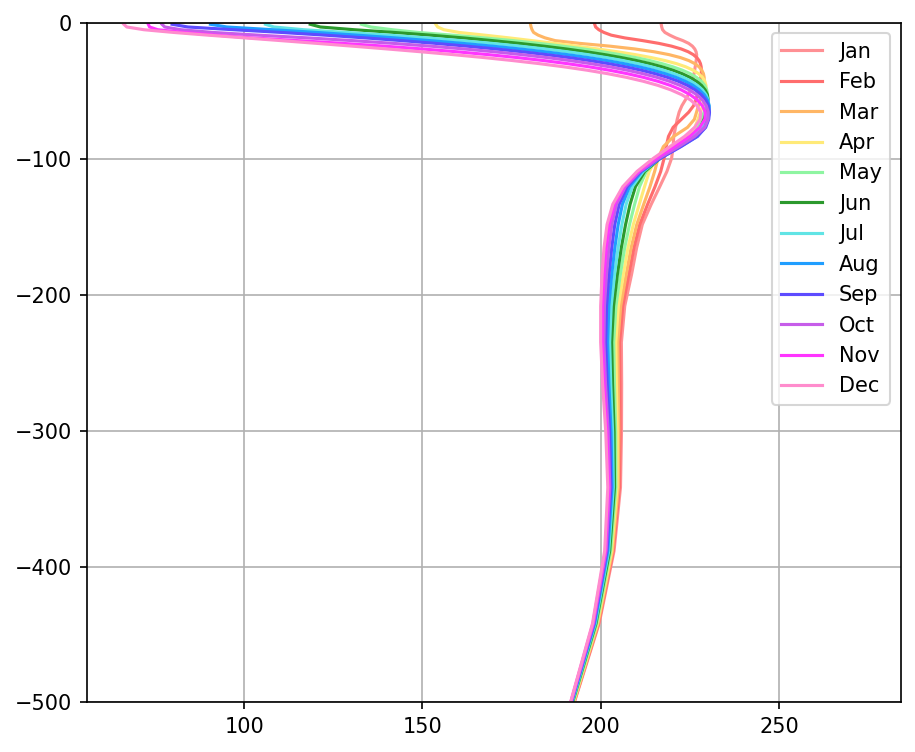

In [43]:
fig = plt.figure(figsize=(7, 6),dpi=150)

plt.subplot(1,1,1)
#ds.temp[0:31,:,0,0].mean('Time').plot()
                                                 #(cmap=cmocean.cm.thermal,vmin=0,vmax=15)
plt.plot(ds.O2[0:31,:,0,0].mean('Time'),-ds.zl,label='Jan',color='#ff9094')
plt.plot(ds.O2[31:59,:,0,0].mean('Time'),-ds.zl,label='Feb',color='#ff6d6d')
plt.plot(ds.O2[59:90,:,0,0].mean('Time'),-ds.zl,label='Mar',color='#ffb665')
plt.plot(ds.O2[90:120,:,0,0].mean('Time'),-ds.zl,label='Apr',color='#ffea78')
plt.plot(ds.O2[120:151,:,0,0].mean('Time'),-ds.zl,label='May',color='#8ef5a1')
plt.plot(ds.O2[151:181,:,0,0].mean('Time'),-ds.zl,label='Jun',color='#2c992d')
plt.plot(ds.O2[181:212,:,0,0].mean('Time'),-ds.zl,label='Jul',color='#61e4e5')
plt.plot(ds.O2[212:243,:,0,0].mean('Time'),-ds.zl,label='Aug',color='#209eff')
plt.plot(ds.O2[243:273,:,0,0].mean('Time'),-ds.zl,label='Sep',color='#5d4cff')
plt.plot(ds.O2[273:304,:,0,0].mean('Time'),-ds.zl,label='Oct',color='#c65de9')
plt.plot(ds.O2[304:334,:,0,0].mean('Time'),-ds.zl,label='Nov',color='#ff35ff')
plt.plot(ds.O2[334:365,:,0,0].mean('Time'),-ds.zl,label='Dec',color='#ff8ccd')

#ds.temp[0:31,:,0,0].mean('Time').plot(label='Jan',color='#ff9094')

#forcing.evap[:,1,1].plot(label='evap',color='blue')
plt.legend(); plt.grid('on'); #plt.xlim([189,230]); 
plt.ylim([-500,0])

(-500.0, 0.0)

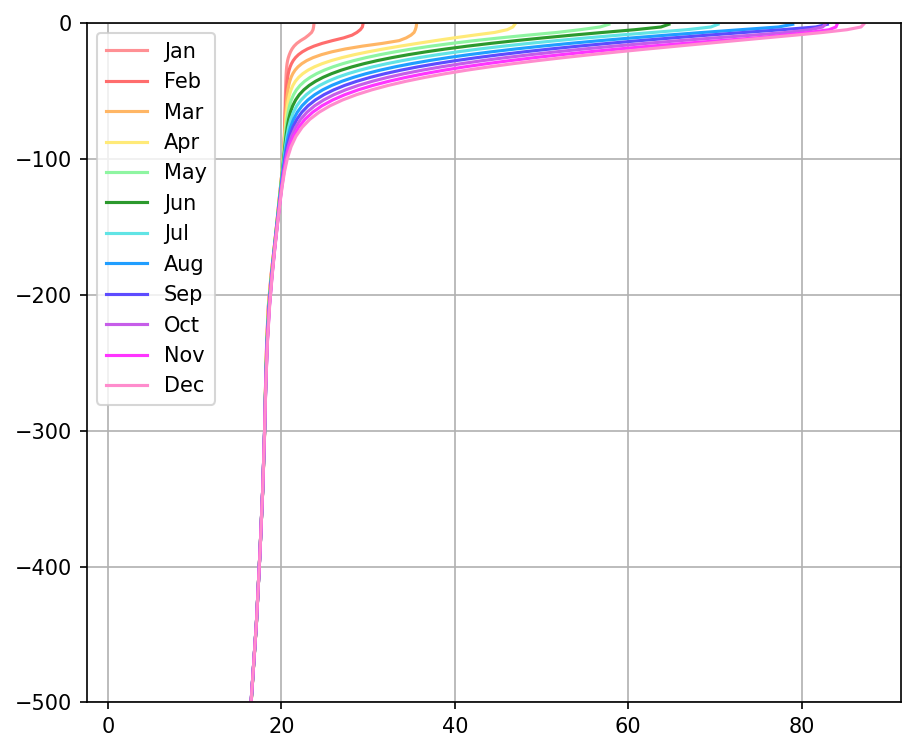

In [46]:
fig = plt.figure(figsize=(7, 6),dpi=150)

plt.subplot(1,1,1)
#ds.temp[0:31,:,0,0].mean('Time').plot()
                                                 #(cmap=cmocean.cm.thermal,vmin=0,vmax=15)
plt.plot(ds.temp[0:31,:,0,0].mean('Time'),-ds.zl,label='Jan',color='#ff9094')
plt.plot(ds.temp[31:59,:,0,0].mean('Time'),-ds.zl,label='Feb',color='#ff6d6d')
plt.plot(ds.temp[59:90,:,0,0].mean('Time'),-ds.zl,label='Mar',color='#ffb665')
plt.plot(ds.temp[90:120,:,0,0].mean('Time'),-ds.zl,label='Apr',color='#ffea78')
plt.plot(ds.temp[120:151,:,0,0].mean('Time'),-ds.zl,label='May',color='#8ef5a1')
plt.plot(ds.temp[151:181,:,0,0].mean('Time'),-ds.zl,label='Jun',color='#2c992d')
plt.plot(ds.temp[181:212,:,0,0].mean('Time'),-ds.zl,label='Jul',color='#61e4e5')
plt.plot(ds.temp[212:243,:,0,0].mean('Time'),-ds.zl,label='Aug',color='#209eff')
plt.plot(ds.temp[243:273,:,0,0].mean('Time'),-ds.zl,label='Sep',color='#5d4cff')
plt.plot(ds.temp[273:304,:,0,0].mean('Time'),-ds.zl,label='Oct',color='#c65de9')
plt.plot(ds.temp[304:334,:,0,0].mean('Time'),-ds.zl,label='Nov',color='#ff35ff')
plt.plot(ds.temp[334:365,:,0,0].mean('Time'),-ds.zl,label='Dec',color='#ff8ccd')

#ds.temp[0:31,:,0,0].mean('Time').plot(label='Jan',color='#ff9094')

#forcing.evap[:,1,1].plot(label='evap',color='blue')
plt.legend(); plt.grid('on'); #plt.xlim([16,29]); 
plt.ylim([-500,0])

In [6]:
# fig = plt.figure(figsize=(7, 6),dpi=150)

# plt.subplot(2,1,1)
# forcing.precip[:,1,1].plot(label='precip',color='purple')
# forcing.evap[:,1,1].plot(label='evap',color='blue')
# plt.legend(); plt.grid('on'); plt.xlim([0,1825]); #plt.ylim([-0.3,0.3])

# plt.subplot(2,1,2)
# forcing.PRCmE[:,1,1].plot(color='y')
# plt.grid('on'); 
# plt.xlim([0,1825]); #plt.ylim([-500,500])
# fig.tight_layout()


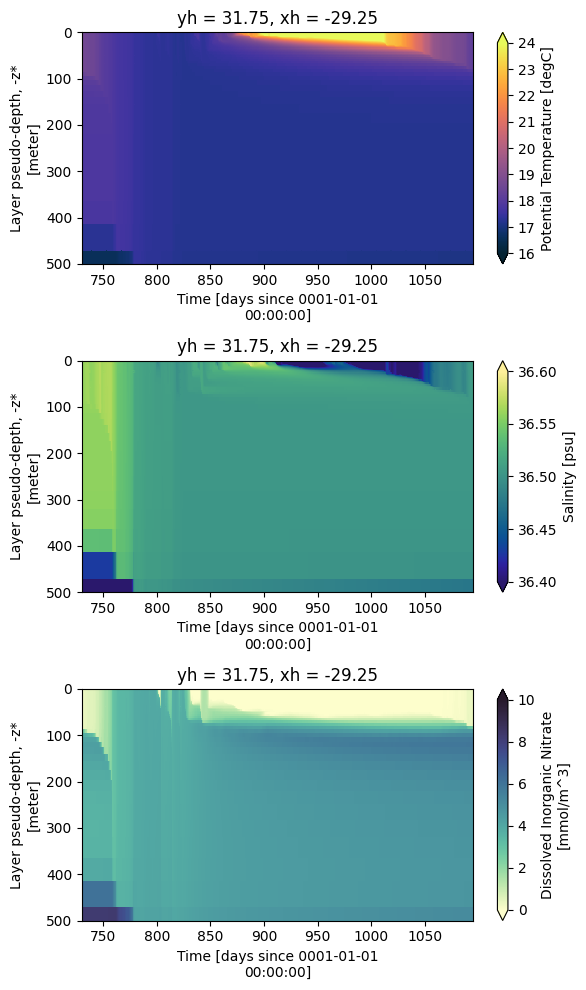

In [7]:
fig = plt.figure(figsize=(6, 10),dpi=100)
plt.subplot(3,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=16,vmax=24)
plt.gca().invert_yaxis()
plt.ylim([500,0]);
plt.xlim([365*2,365*3]);

plt.subplot(3,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=36.4, vmax=36.6)
plt.gca().invert_yaxis()
plt.ylim([500,0]);
plt.xlim([365*2,365*3]);

plt.subplot(3,1,3)
ds.NO3[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.deep,vmin=0., vmax=10)
plt.gca().invert_yaxis()
plt.ylim([500,0]);
plt.xlim([365*2,365*3]);

fig.tight_layout()

In [8]:
np.nanmin(ds.NO3[:,:,1,1])

-0.009801249

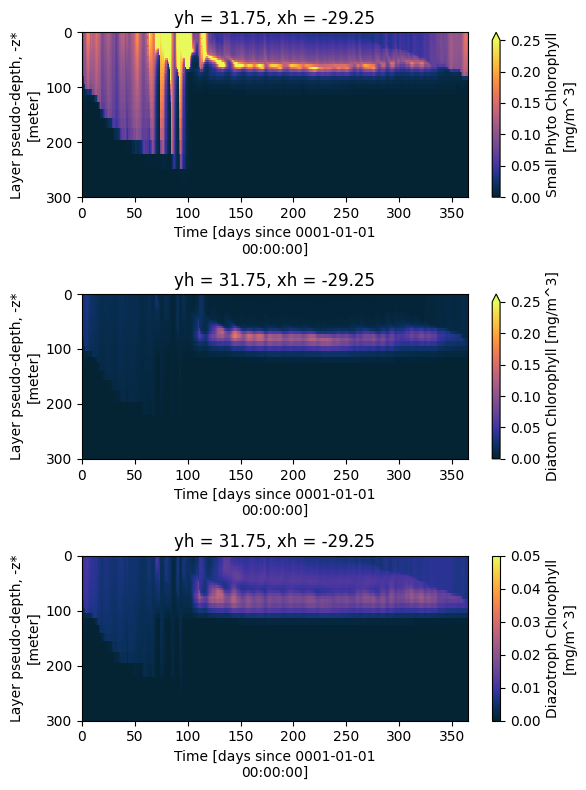

In [9]:
fig = plt.figure(figsize=(6, 8),dpi=100)
plt.subplot(3,1,1)
ds.spChl[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=.25)
plt.gca().invert_yaxis()
plt.ylim([300,0]);
plt.xlim([0,365]);


plt.subplot(3,1,2)
ds.diatChl[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=.25)
plt.gca().invert_yaxis()
plt.ylim([300,0]);
plt.xlim([0,365]);

plt.subplot(3,1,3)
ds.diazChl[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=.05)
plt.gca().invert_yaxis()
plt.ylim([300,0]);
plt.xlim([0,365]);

fig.tight_layout()

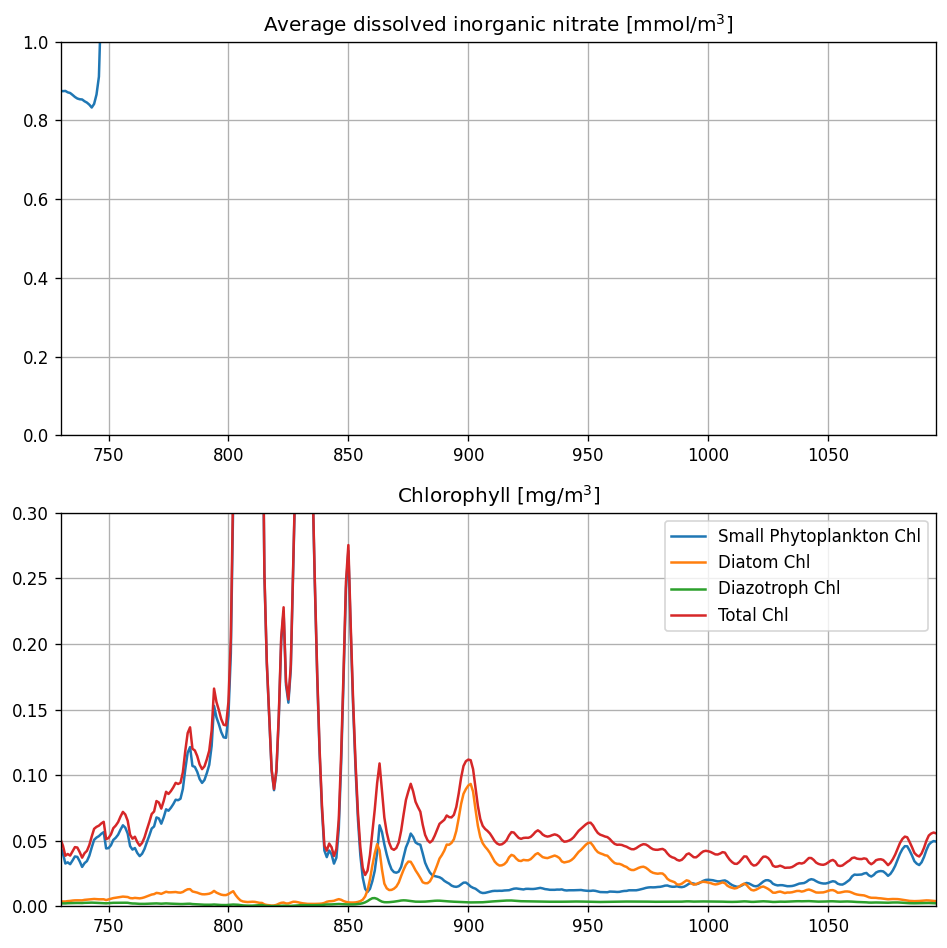

In [10]:
#print(ds.NO3.zl[0:31])

timelim=365*3
depthlim=31
NO3_upper100=(ds.NO3[0:timelim,0:depthlim,0,0]*dz[0:depthlim]/99.555).sum('zl')

depthlim300=41
spChl_upper300    = (ds.spChl[0:timelim,0:depthlim300,0,0]*dz[0:depthlim300]/301).sum('zl')
diatChl_upper300  = (ds.diatChl[0:timelim,0:depthlim300,0,0]*dz[0:depthlim300]/301).sum('zl')
diazChl_upper300  = (ds.diazChl[0:timelim,0:depthlim300,0,0]*dz[0:depthlim300]/301).sum('zl')
totalChl_upper300 = spChl_upper300+diatChl_upper300+diazChl_upper300

fig = plt.figure(figsize=(8, 8),dpi=120)
plt.subplot(2,1,1)
plt.plot(ds.Time[0:timelim],NO3_upper100)
#ds.temp[:,:,1,1].transpose('zl','Time',).plot()
#plt.gca().invert_yaxis()
plt.grid()
plt.ylim([0,1.0]);
plt.xlim([365*2,365*3]);
plt.title('Average dissolved inorganic nitrate [mmol/m$^3$]')

plt.subplot(2,1,2)
plt.title('Chlorophyll [mg/m$^3$]')

plt.plot(ds.Time[0:timelim],spChl_upper300,label='Small Phytoplankton Chl')
plt.plot(ds.Time[0:timelim],diatChl_upper300,label='Diatom Chl')
plt.plot(ds.Time[0:timelim],diazChl_upper300,label='Diazotroph Chl')
plt.plot(ds.Time[0:timelim],totalChl_upper300,label='Total Chl')
plt.legend()
plt.ylim([0,.3]);
plt.xlim([365*2,365*3]);
plt.grid()


fig.tight_layout()

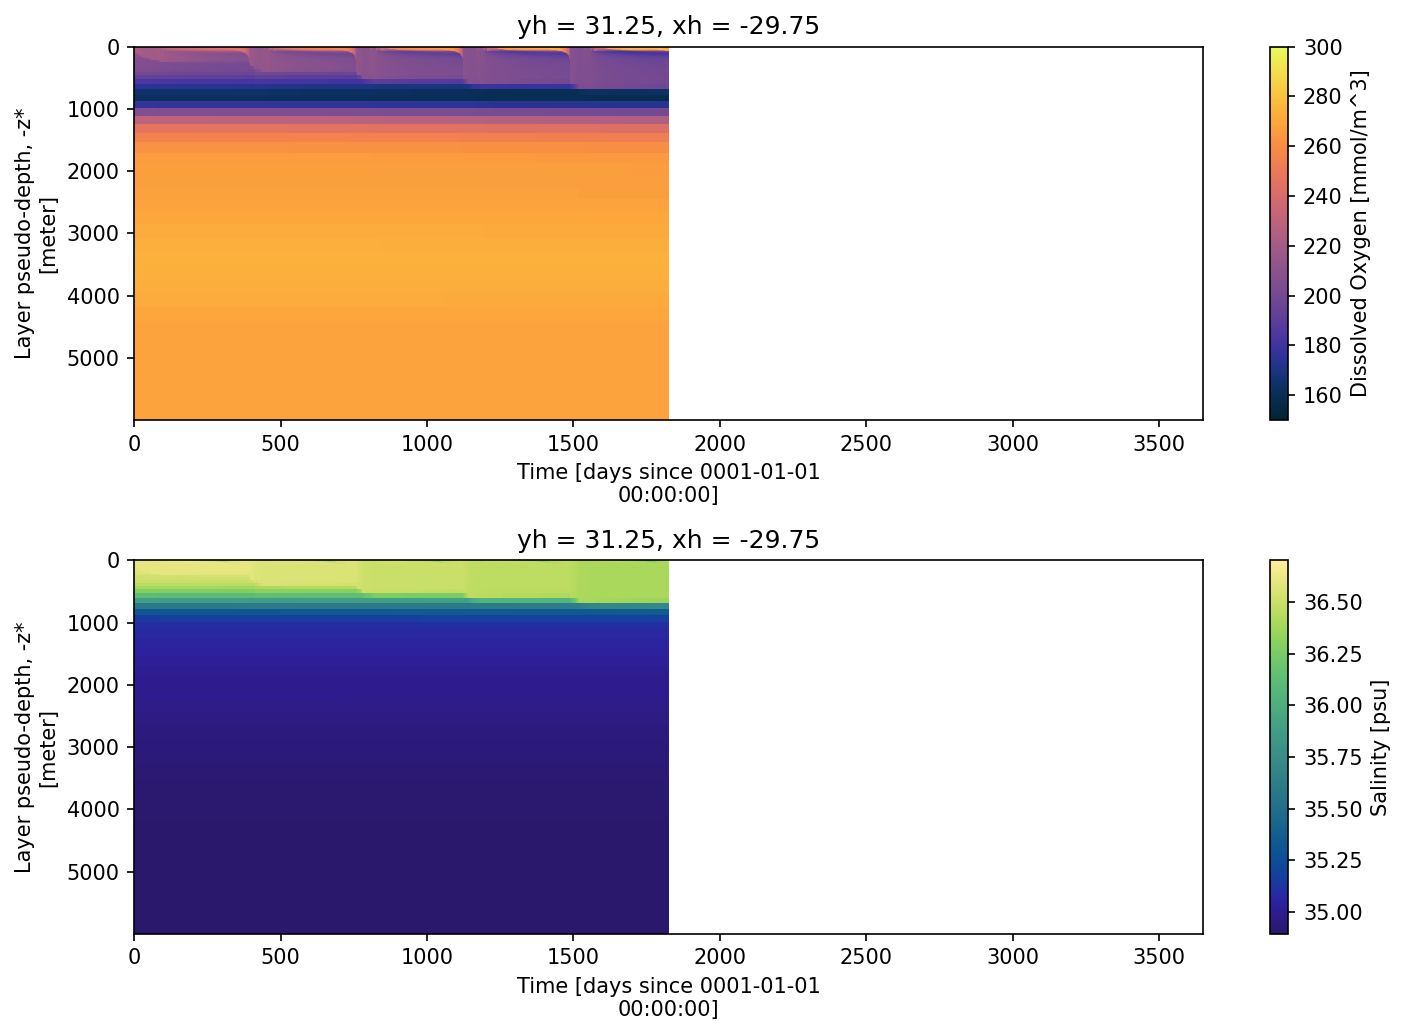

In [11]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
prog.O2[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=150,vmax=300)
plt.gca().invert_yaxis()
plt.xlim([0,3650]);

plt.subplot(2,1,2)
ds.salt[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()
plt.xlim([0,3650]);

fig.tight_layout()


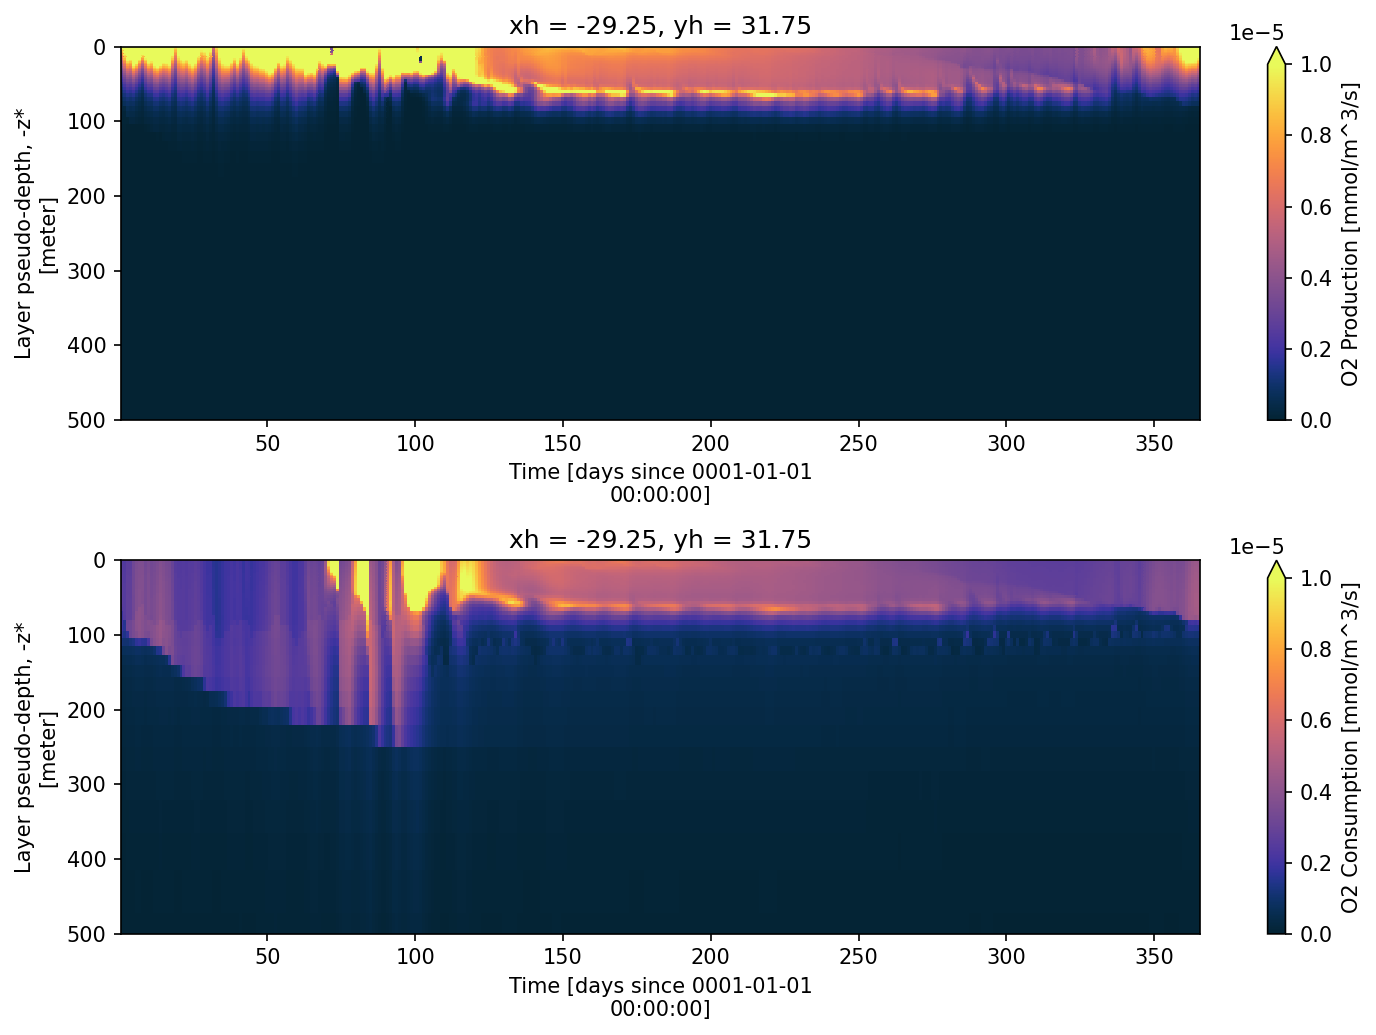

In [12]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
timelim=365
MARBL.O2_PRODUCTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

plt.subplot(2,1,2)
MARBL.O2_CONSUMPTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

fig.tight_layout()


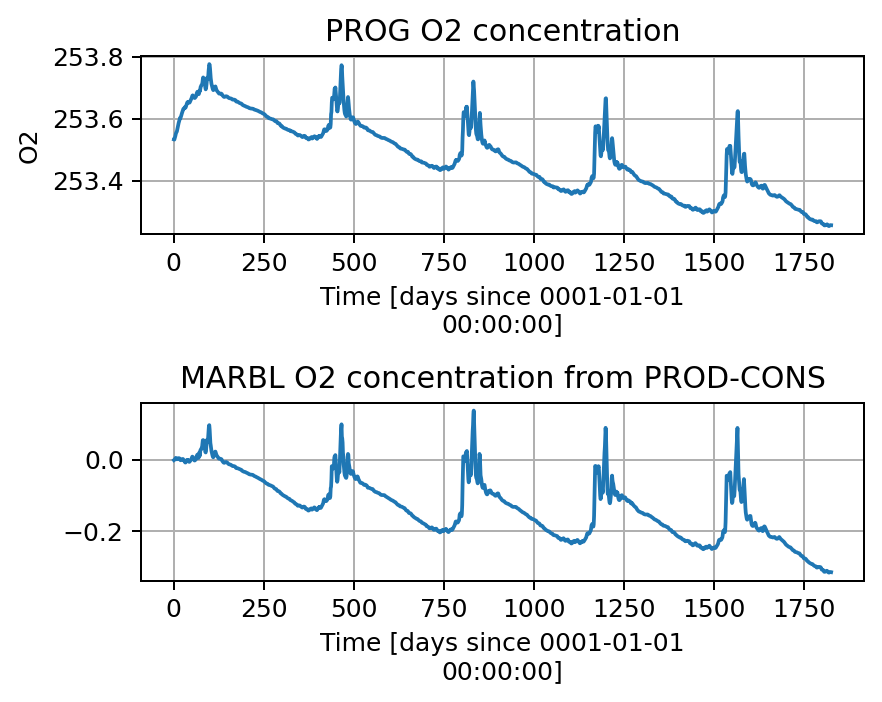

In [13]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(ds.O2[0:timelim,:,0,0]*dz/6000).sum('zl').plot()

plt.grid()
plt.title('PROG O2 concentration')


plt.subplot(2,1,2)
((MARBL.O2_PRODUCTION[0:timelim,:,0,0]-MARBL.O2_CONSUMPTION[0:timelim,:,0,0])*86400*dz/6000).sum('zl').cumsum('Time').plot()
plt.title('MARBL O2 concentration from PROD-CONS')

plt.grid()
plt.tight_layout()

Text(0.5, 1.0, 'difference between MARBL and prog files')

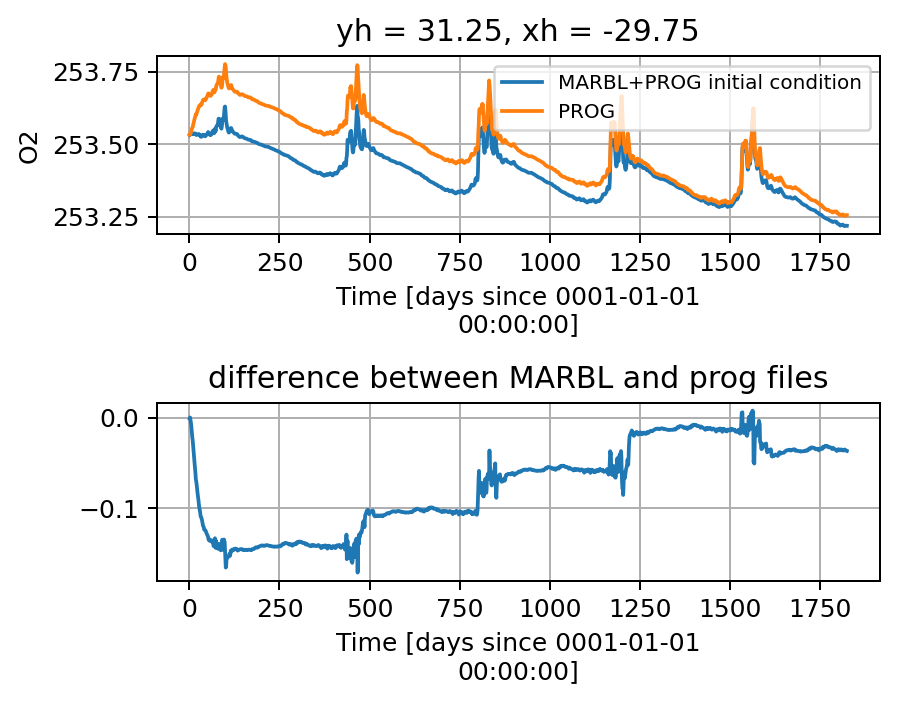

In [14]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
O2_IC = (ds.O2[0,:,0,0]*dz/6000).sum('zl')
MARBL_result = (((MARBL.O2_PRODUCTION[0:timelim,:,0,0]-MARBL.O2_CONSUMPTION[0:timelim,:,0,0])*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC)
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,0,0]*dz/6000).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')

## There is a mismatch, maybe it's because of the xh, yh dimensions that I've neglected? (Using (0,0))

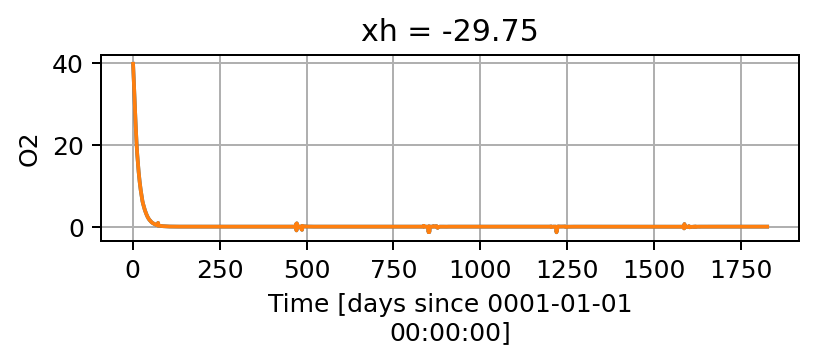

In [15]:
fig = plt.figure(figsize=(5, 3),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(prog.O2[0:timelim,:,1,0]-prog.O2[0:timelim,:,0,0]).sum('zl').plot()
(ds.O2[0:timelim,:,1,0]-ds.O2[0:timelim,:,0,0]).sum('zl').plot()

#(prog.O2[0:timelim,:,0,0]*dz/6000).sum('zl').plot()
plt.grid()
#plt.gca().invert_yaxis()
#plt.ylim([500,0])

In [16]:
np.nanmax(ds.zl-prog.zl)

0.0

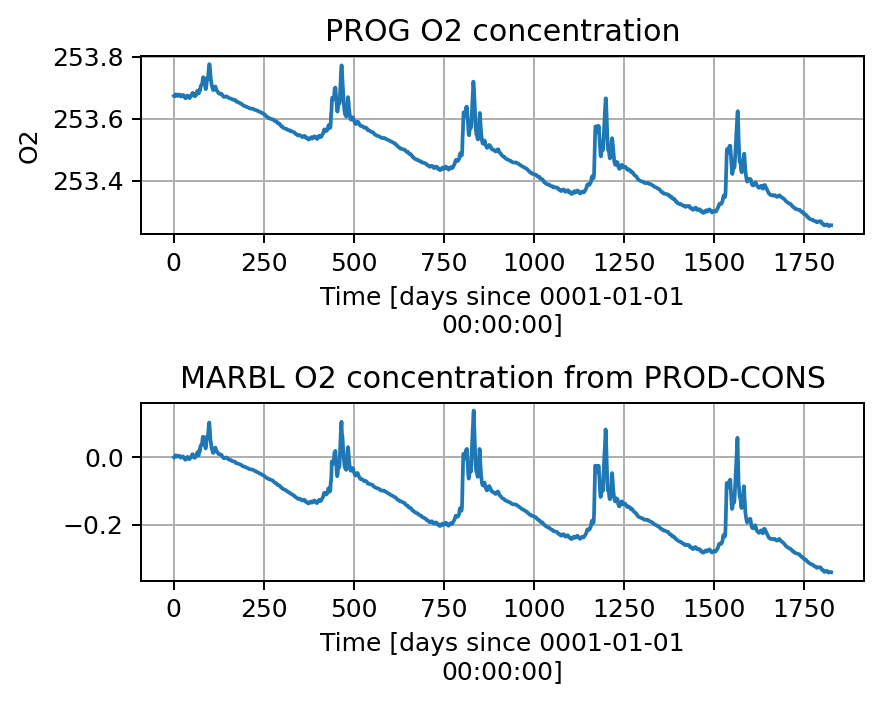

In [17]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl').plot()
plt.grid()
plt.title('PROG O2 concentration')


plt.subplot(2,1,2)
((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time').plot()
plt.title('MARBL O2 concentration from PROD-CONS')

plt.grid()
plt.tight_layout()

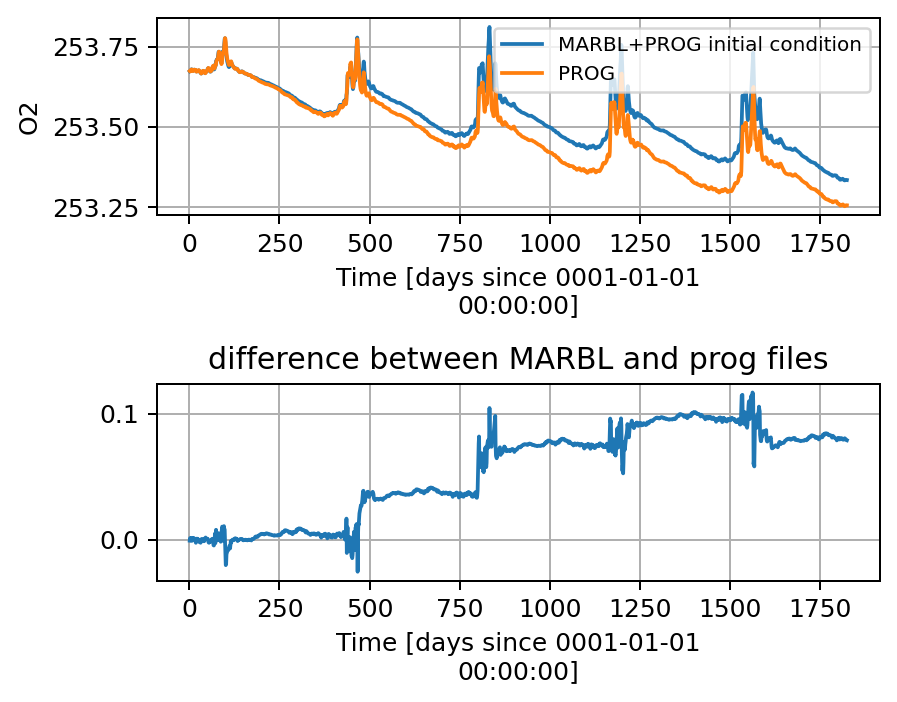

In [18]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
O2_IC = (ds.O2[0,:,:,:].sum('xh').sum('yh')/4*dz/6000).sum('zl')
MARBL_result =((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')
plt.tight_layout()

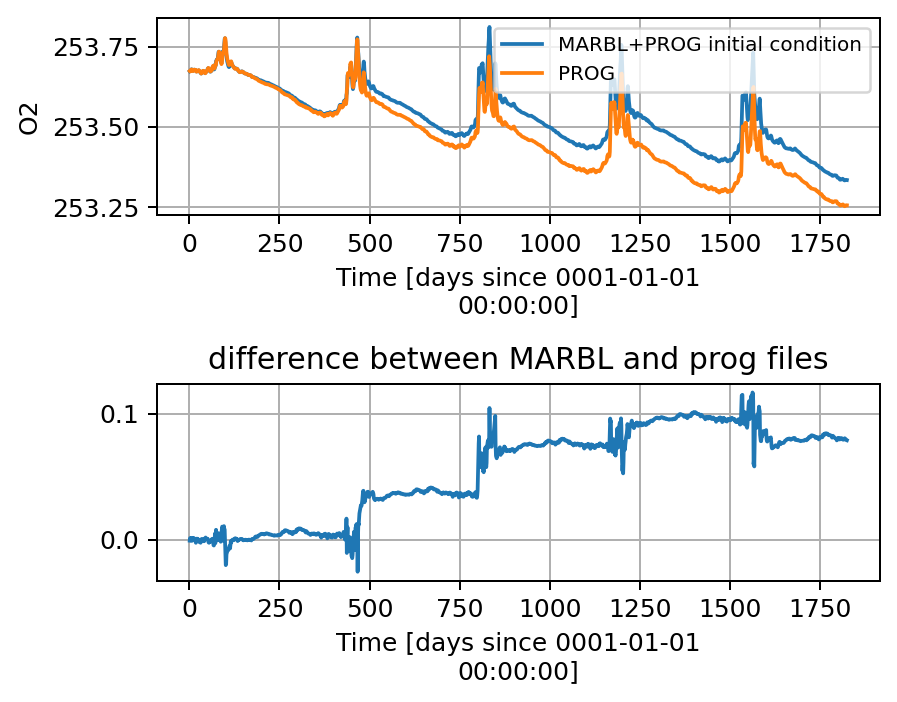

In [19]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*1000
O2_IC = (ds.O2[0,:,:,:].sum('xh').sum('yh')/4*dz/6000).sum('zl')
MARBL_result =((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')
plt.tight_layout()

In [20]:
print(visc)

<xarray.Dataset>
Dimensions:               (Time: 1825, nv: 2, xh: 2, xq: 3, yh: 2, yq: 3, zi: 76, zl: 75)
Coordinates:
  * xh                    (xh) float64 -29.75 -29.25
  * yh                    (yh) float64 31.25 31.75
  * zi                    (zi) float64 0.0 2.0 4.0 ... 5.546e+03 5.773e+03 6e+03
  * Time                  (Time) float64 0.5 1.5 2.5 ... 1.824e+03 1.824e+03
  * nv                    (nv) float64 1.0 2.0
  * zl                    (zl) float64 1.0 3.0 5.0 ... 5.659e+03 5.886e+03
  * xq                    (xq) float64 -30.0 -29.5 -29.0
  * yq                    (yq) float64 31.0 31.5 32.0
Data variables:
    Kd_interface          (Time, zi, yh, xh) float32 ...
    KPP_uStar             (Time, yh, xh) float32 ...
    KPP_buoyFlux          (Time, zi, yh, xh) float32 ...
    KPP_QminusSW          (Time, yh, xh) float32 ...
    KPP_netSalt           (Time, yh, xh) float32 ...
    KPP_OBLdepth          (Time, yh, xh) float32 ...
    KPP_sigma             (Time, zi, yh, xh

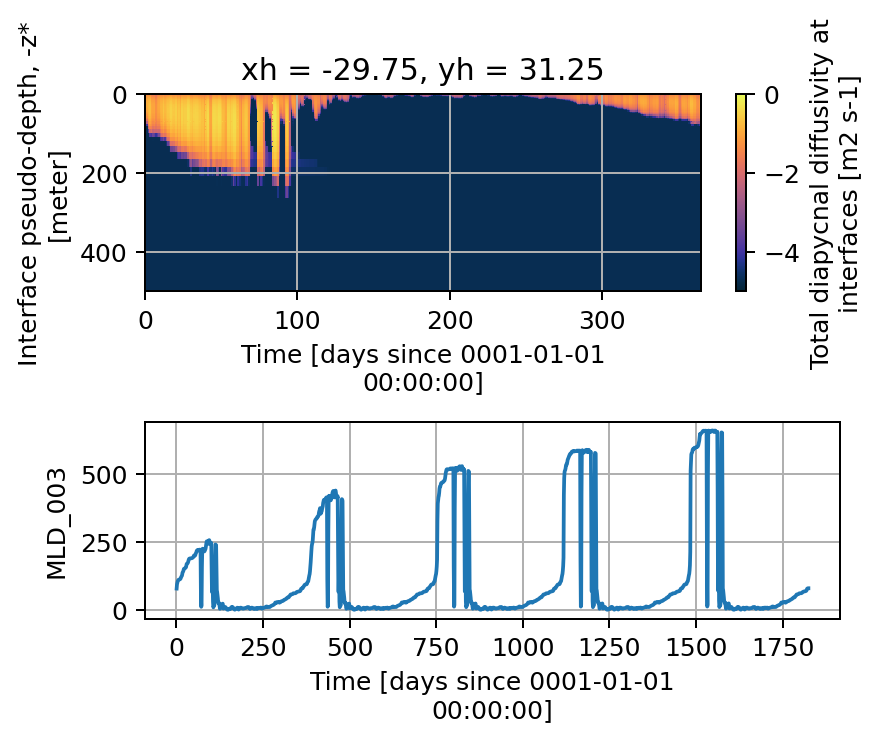

In [21]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)

timelim=365
xr.ufuncs.log10(visc.Kd_interface[0:timelim,:,0,0]).transpose('zi','Time',).plot(cmap=cmocean.cm.thermal,vmin=-5,vmax=0)
plt.gca().invert_yaxis()
plt.ylim([500,0])
plt.grid()

plt.subplot(2,1,2)
(visc.MLD_003.sum('xh').sum('yh')/4).plot()
#plt.xlim([0,3650])
#plt.ylim([0,1000])
plt.grid()
plt.tight_layout()


<xarray.DataArray 'MLD_003' (Time: 36500, yh: 2, xh: 2)>
[146000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -29.75 -29.25
  * yh       (yh) float64 31.25 31.75
  * Time     (Time) float64 0.5 1.5 2.5 3.5 ... 3.65e+04 3.65e+04 3.65e+04
Attributes:
    units:          m
    long_name:      Mixed layer depth (delta rho = 0.03)
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [42]:
# print(MARBL.O2_CONSUMPTION)
# print(MARBL.O2_PRODUCTION)
# print(prog.O2)


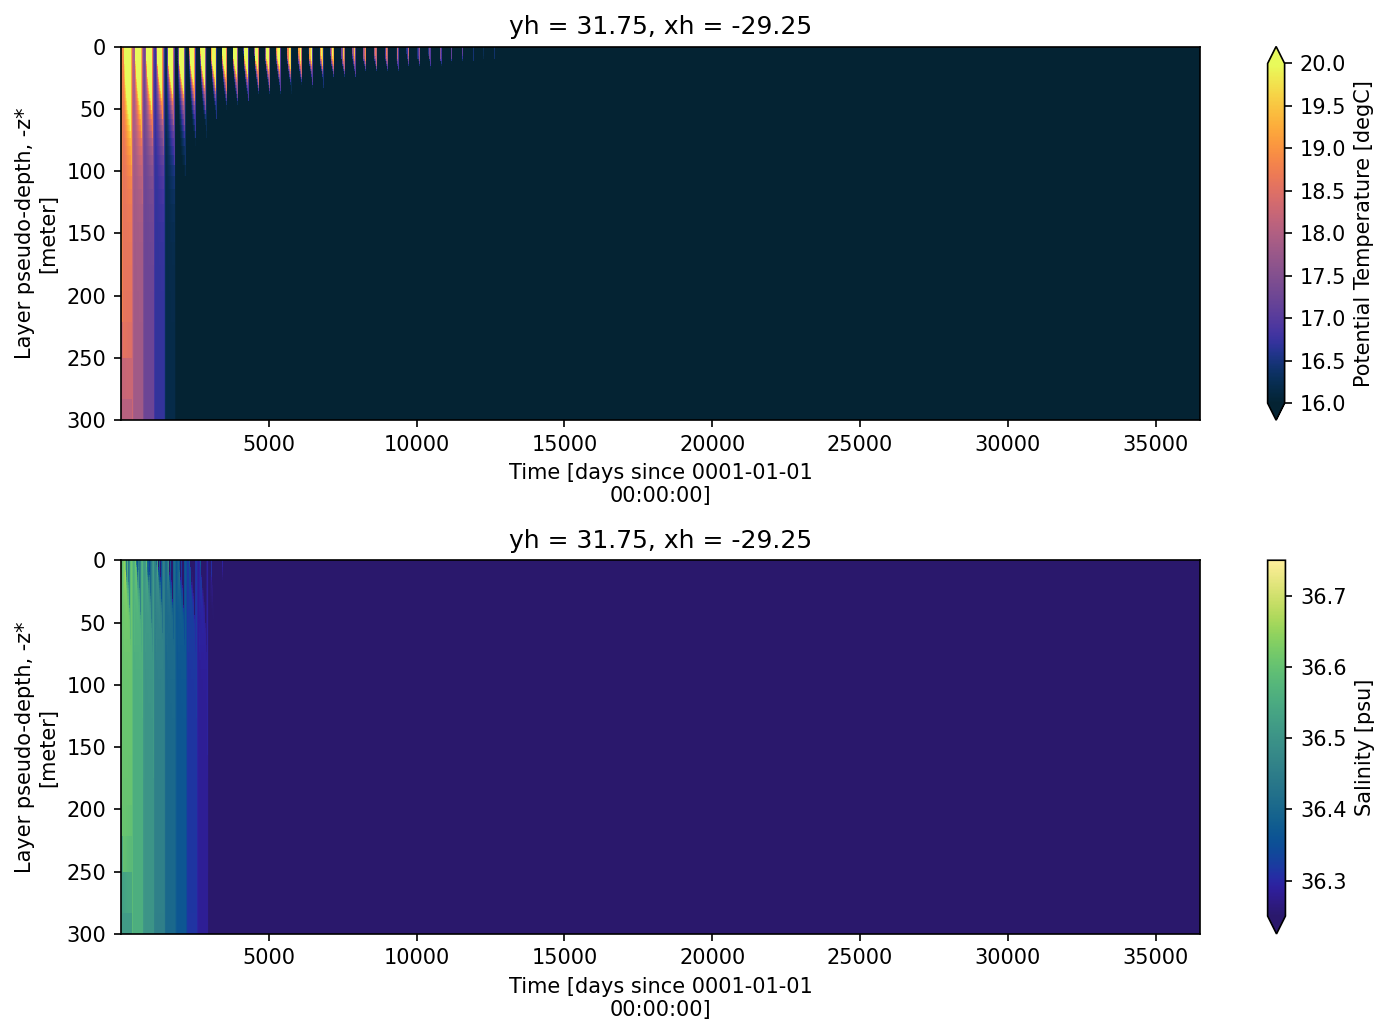

In [10]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=16,vmax=20)
plt.ylim([0,300])
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=36.25,vmax=36.75)
plt.ylim([0,300])

plt.gca().invert_yaxis()

fig.tight_layout()

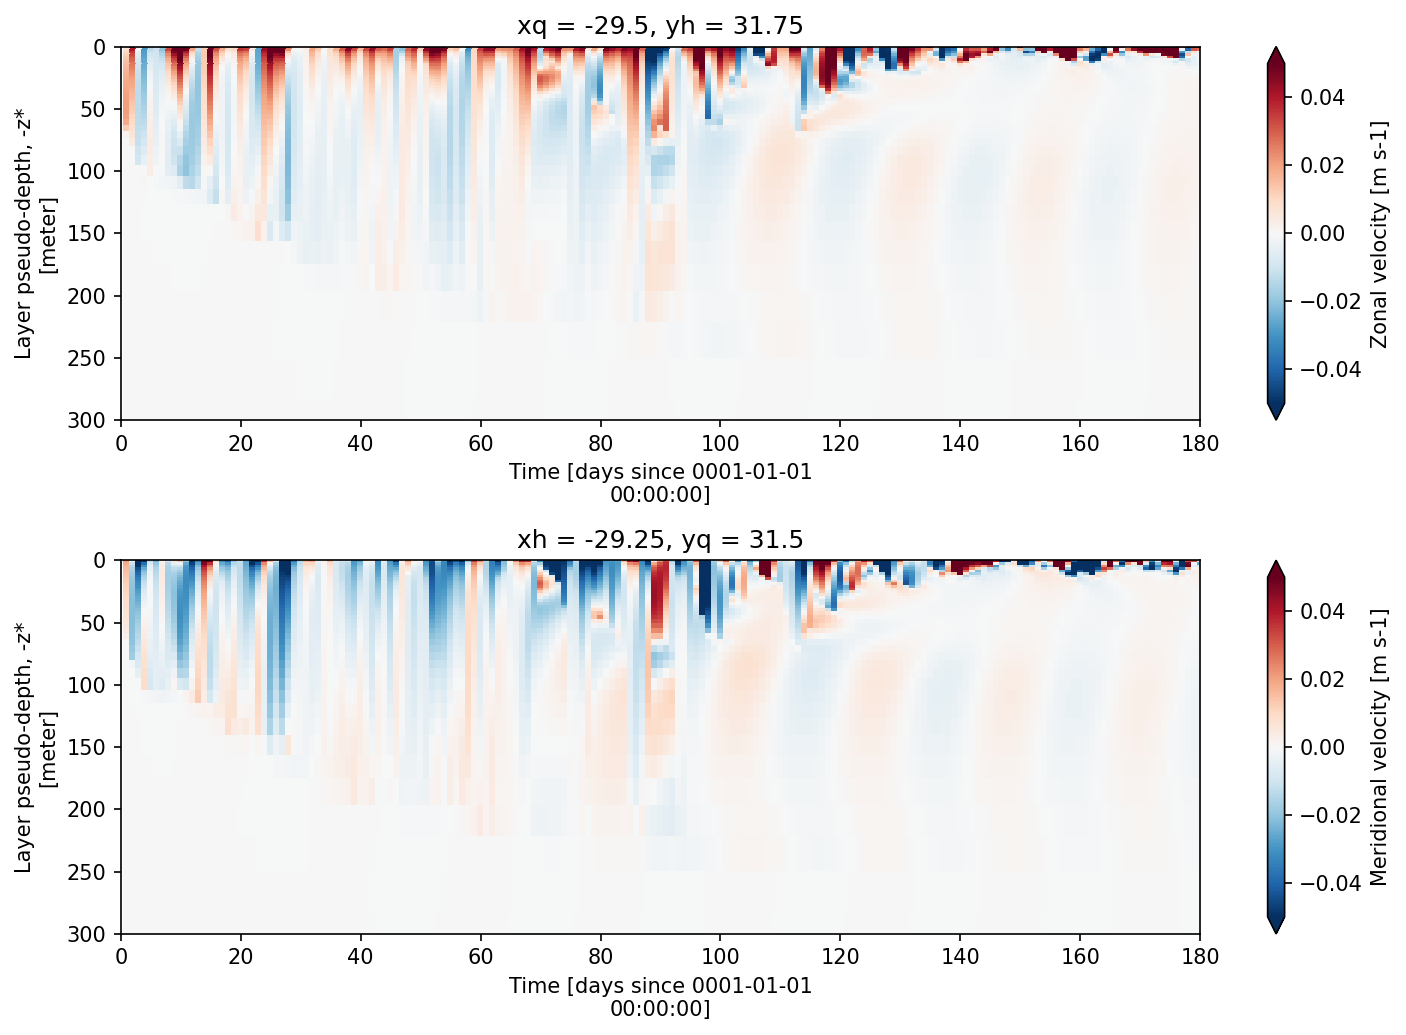

In [11]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.u[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.v[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

fig.tight_layout()

In [68]:

grid= Grid(ds, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


u = ds.u[:,:,:,:]; u=grid.interp(u,axis='X')
v = ds.v[-1,0,:];  v=grid.interp(v,axis='Y')

vel_mag = u**2+v**2

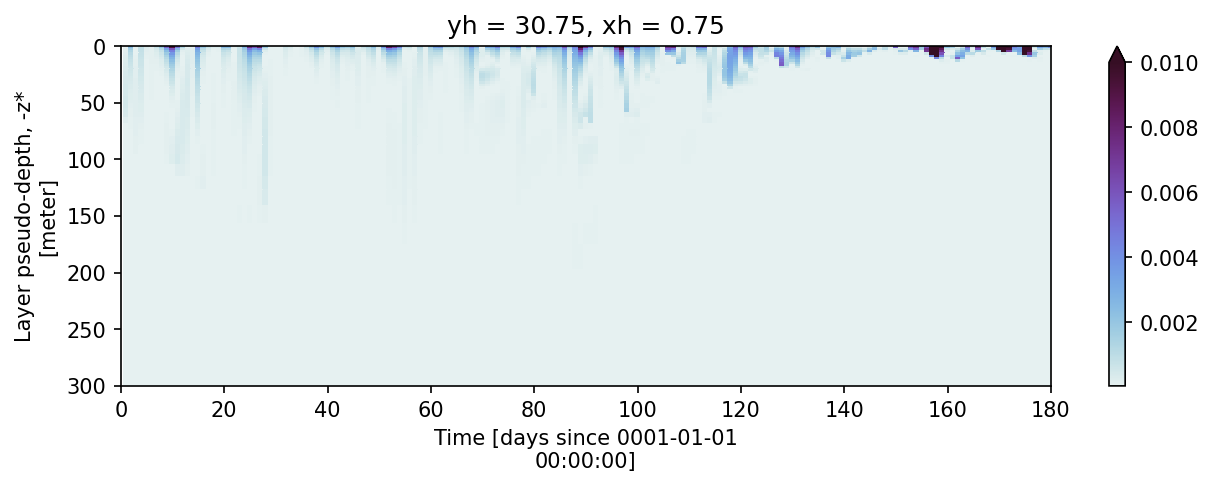

In [72]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 3),dpi=150)
plt.subplot(1,1,1)
vel_mag[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.dense,vmax=0.01)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

In [66]:
%

0.0